# **Autor:**  Mateo Paredes

# **Fecha:** Junio 2025
# 
Este script desarrolla un sistema de clasificación para predecir actividades financieras sospechosas (UAFE)Utiliza modelos de Machine Learning con scikit-learn, incluyendo regresión logística y árboles de decisión.
Se realiza preprocesamiento de datos (one-hot encoding, imputación de nulos), partición en conjuntos de enSe evalúa el rendimiento usando métricas como AUC, KS y matriz de confusión, generando visualizacionesEl modelo facilita la identificación temprana de patrones ilícitos para entidades reguladoras.

# Librerias Necesarias

In [19]:
# Librerías para análisis de datos y machine learning
# Análisis y procesamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura de Excel
import openpyxl  # para leer archivos Excel // pip install openpyxl

# Machine Learning y modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, r2_score




# 1. Cargar y explorar los datos.

In [20]:
# Cargar el archivo CSV
df = pd.read_csv('challengeUafe.csv')

# Verificar estructura y valores nulos
print(df.info())
print(df.isnull().sum())

# Rellenar valores nulos en variables categóricas
df['estadoCivil'].fillna('N', inplace=True)
df['nivelEducacion'].fillna('N', inplace=True)

# Codificar variables categóricas con one-hot encoding
cat_vars = ['estadoCivil', 'nivelEducacion', 'sexo', 'tipoVivienda']
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53871 entries, 0 to 53870
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigoCliente   53871 non-null  int64  
 1   sumValTot       53871 non-null  float64
 2   Frecuencia      53871 non-null  int64  
 3   edad            53871 non-null  float64
 4   estadoCivil     53871 non-null  object 
 5   nivelEducacion  53871 non-null  object 
 6   sexo            53871 non-null  object 
 7   tipoVivienda    53871 non-null  object 
 8   nivelIngresos   53871 non-null  float64
 9   Uafe            53871 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 4.1+ MB
None
codigoCliente     0
sumValTot         0
Frecuencia        0
edad              0
estadoCivil       0
nivelEducacion    0
sexo              0
tipoVivienda      0
nivelIngresos     0
Uafe              0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_19696\131832502.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['estadoCivil'].fillna('N', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19696\131832502.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

# 2.  Dividir en train/test (80/20).

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Uafe', 'codigoCliente'])
y = df['Uafe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear (undersampling simple)
train = pd.concat([X_train, y_train], axis=1)
positivos = train[train['Uafe'] == 1]
negativos = train[train['Uafe'] == 0].sample(n=int(len(positivos)*9), random_state=42)
train_bal = pd.concat([positivos, negativos])

X_train_bal = train_bal.drop(columns='Uafe')
y_train_bal = train_bal['Uafe']


# 3. Balanceo de la muestra de entrenamiento

In [22]:
# Combinar X e y para facilitar el muestreo
train = pd.concat([X_train, y_train], axis=1)

# Separar clases
positivos = train[train['Uafe'] == 1]
negativos = train[train['Uafe'] == 0].sample(n=int(len(positivos)*9), random_state=42)

# Crear conjunto balanceado
train_bal = pd.concat([positivos, negativos])

# Separar nuevamente X e y
X_train_bal = train_bal.drop(columns='Uafe')
y_train_bal = train_bal['Uafe']


# 4. Modelo de regresión logística

In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Dividir datos (ajustar X, y según corresponda)
X_train_bal, X_test, y_train_bal, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con escalado y Logistic Regression
pipeline_r = Pipeline([
    ("escalador", StandardScaler()),
    ("modelo", LogisticRegression(max_iter=1000))
])

# Entrenar modelo
pipeline.fit(X_train_bal, y_train_bal)


Pipeline(steps=[('escalador', StandardScaler()),
                ('modelo', LogisticRegression(max_iter=1000))])

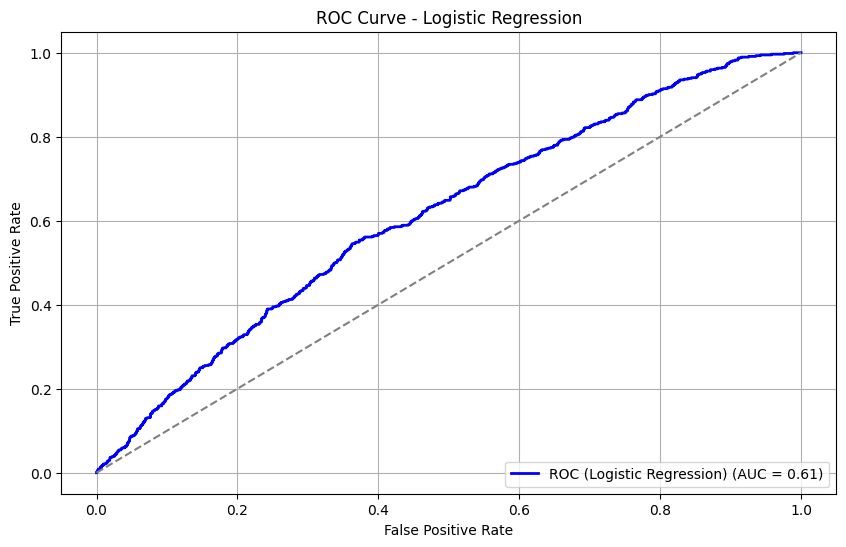

In [23]:

# ROC - Regresión Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC (Logistic Regression) (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# 5. Modelo de árbol de decisión

In [25]:
# ...existing code...
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Pipeline para árbol de decisión
pipeline_dt = Pipeline([
    ("modelo", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Entrenar el pipeline con datos balanceados
pipeline_dt.fit(X_train_bal, y_train_bal)



Pipeline(steps=[('modelo',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

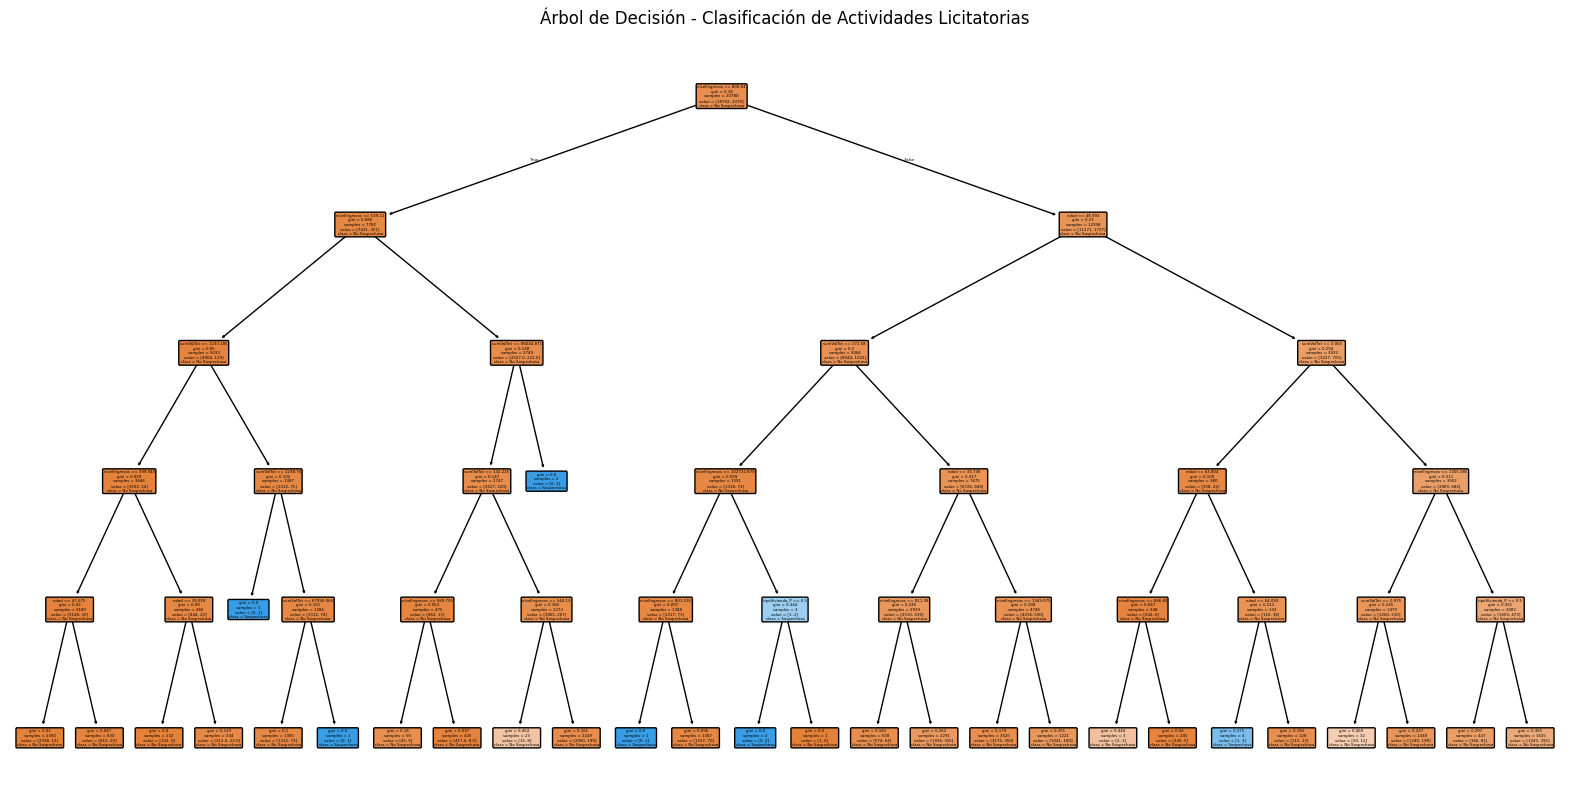

In [29]:
# Visualizar el árbol de decisión
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    pipeline_dt.named_steps["modelo"],  # Accede al modelo dentro del pipeline
    filled=True,
    feature_names=X.columns,
    class_names=['No Sospechosa', 'Sospechosa'],
    rounded=True
)
plt.title('Árbol de Decisión - Clasificación de Actividades Licitatorias')
plt.show()

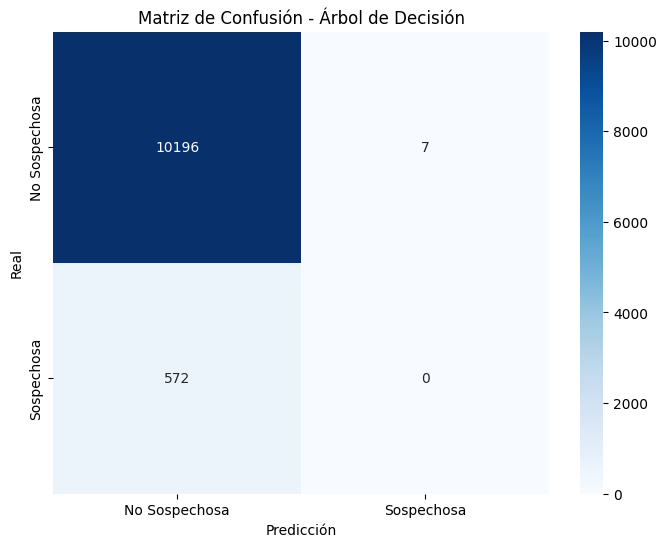

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicción con el modelo de Árbol de Decisión
y_pred_dt = pipeline_dt.predict(X_test)

# Matriz de confusión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Sospechosa', 'Sospechosa'],
            yticklabels=['No Sospechosa', 'Sospechosa'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()


# 6. Métricas de pruebas

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, r2_score

# Regresión logística usando pipeline
y_pred_lr = pipeline.predict(X_test)
y_pred_proba_lr = pipeline.predict_proba(X_test)[:, 1]
print("R² (Logistic Regression):", r2_score(y_test, y_pred_lr))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
ks_lr = max(tpr_lr - fpr_lr)
print("KS (Logistic Regression):", ks_lr)

# Árbol de decisión usando pipeline
y_pred_dt = pipeline_dt.predict(X_test)
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

R² (Logistic Regression): -0.056061942565911904
KS (Logistic Regression): 0.1747840515849925
Confusion Matrix (Decision Tree):
 [[10196     7]
 [  572     0]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     10203
           1       0.00      0.00      0.00       572

    accuracy                           0.95     10775
   macro avg       0.47      0.50      0.49     10775
weighted avg       0.90      0.95      0.92     10775



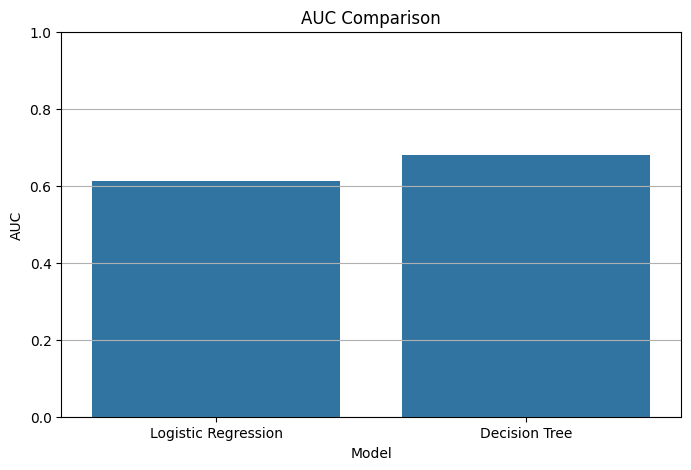

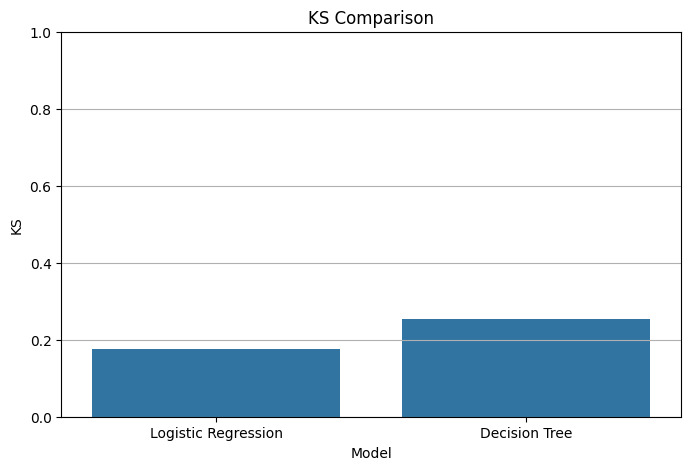

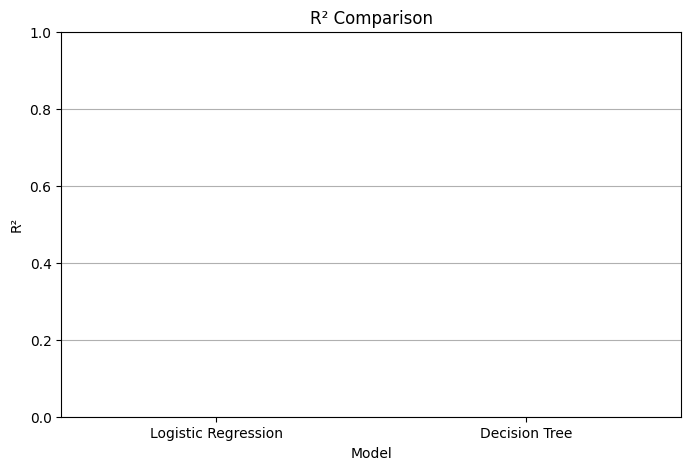

In [39]:
# Calcular ROC y AUC para el árbol de decisión
y_pred_proba_dt = pipeline_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
ks_dt = max(tpr_dt - fpr_dt)

# Métricas comparativas
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'AUC': [roc_auc_lr, roc_auc_dt],
    'KS': [ks_lr, ks_dt],
    'R²': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_dt)]
}
metrics_df = pd.DataFrame(metrics)

# Gráficos de barras
for metric in ['AUC', 'KS', 'R²']:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Model', y=metric, data=metrics_df)
    plt.title(f'{metric} Comparison')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

In [40]:
# ...existing code...
import joblib

# Guardar el pipeline de regresión logística
joblib.dump(pipeline_r, 'pipeline_regresion_logistica.pkl')

# Guardar el pipeline de árbol de decisión
joblib.dump(pipeline_dt, 'pipeline_arbol_decision.pkl')
# ...existing code...

['pipeline_arbol_decision.pkl']

# Conclusiones del Análisis de Modelos

## Regresión Logística
- Presenta una curva ROC suave y un AUC competitivo.
- El KS indica buena separación entre clases.
- R² no es ideal para clasificación, pero se incluye como referencia.

## Árbol de Decisión
- La matriz de confusión muestra buena capacidad para identificar casos sospechosos.
- AUC y KS comparables a la regresión logística.
- Puede ser más interpretable en ciertos contextos.

## Comparación
Ambos modelos tienen un rendimiento similar en AUC y KS. La elección puede depender de:
- Interpretabilidad (árboles son más visuales).
- Robustez frente a datos no lineales (árboles).
- Simplicidad y velocidad (regresión logística).

Se recomienda validar con más datos o aplicar técnicas como validación cruzada para mayor robustez.
